# <p style="background-color:#42A5F5;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:70px 5px;">Board Game Geek</p>

<img src="https://github.com/JordanMcMullen361/Board-Game-Geek-Analysis/blob/main/Files/Boardgames.png?raw=true">

<p style="font-family:arial;color:#000000;font-size:150%;text-align:left;border-radius:40px 40px;">For this project I have explored a board game database. I have used supervised regression prediction for the game ratings. This data contains the average rating and the baverage rating which has been affected by the board game geek site to help in anti-skewing of the data. I have used the baverage of this analysis. This rating is a continuous variable. With the use of a pipeline I have found the model best fitted and will use this to make the rating predictions.
    
   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#42A5F5;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:70px 5px;">TABLE OF CONTENTS</p> 
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. DATA](#2)
    
* [3. DATA CLEANING/WRANGLING](#3)
    
* [4. EDA (EXPLORATORY DATA ANALYSIS](#4)   
    
* [5. DATA PREPERATION/PROCESSING](#5) 
      
* [6. MODEL SELECTION](#6)
    
* [7. MODEL EVALUATION](#7)
 
* [8. CONCLUSION](#8)

<a id="1"></a>
# <p style="background-color:#42A5F5;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:70px 5px;">IMPORTING LIBRARIES</p>

In [24]:
#### LOAD LIBRARIES

##### Data
import pandas as pd
import numpy as np
import re
from collections import Counter

###### stats
import scipy.stats as stats
import math
import statsmodels.api as sm

##### Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
plt.rcParams.update({'figure.max_open_warning': 0})

#### PreProcessing Test train split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.decomposition import PCA

#### Models
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


#### Evaluation of Models
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
    
np.random.seed(42)

<a id="2"></a>
# <p style="background-color:#42A5F5;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:70px 5px;">DATA</p>

In [2]:
# LOAD IN FILE 
df = pd.read_csv('C://Users//GGPC//Documents//coding//GA//Data//bggdata.csv')

### This Data

This data is was obtained from the Board Game Geek website.

The columns are 

- index - numbered index
- objectid - the identifier on boardgamegeeks.com
- name - name of the game
- yearpublished - the year the game was published
- sortindex - rank of the game on bbg.com
- minplayer - minumum number of players per the publishers
- maxplayers - maximum number of players per the publishers
- minplaytime - minimum playtime required per the publishers
- maxplaytime - maximum playtime per the publishers
- minage - minimum age requiremnet per the publishers
- min_community - minimum players per the community
- max_community - max players per the community
- totalvotes - total number of community vote
- playerage - minimum age requirement per the community
- languagedependence - a rank of amount of in-game text is required during game play
        '(no votes)':0,
        'Extensive use of text - massive conversion needed to be playable':4,
        'Moderate in-game text - needs crib sheet or paste ups':3,
        'No necessary in-game text':1,
        'Some necessary text - easily memorized or small crib sheet':2,
        'Unplayable in another language':5

- userrated - number of users that have rated the game
- average - user average rating from 1-10
- baverage - from the site, determined to be an anti-skewing effort by bgg  with system added mid range ratings (from 1-10)
- stddev - average standard deviation of a rating
- avgweight - a complexity rating from 1-5 Weight
- numweights - number of weight votes
- numgeeklists - number of geeks with game on list
- numtrading - number of people trading the game
- numwanting - number of people wanting the game
- numcomments - number of comments on the site on this game
- siteviews - number of views on the site
- numplays - number of times game was played (according to site users?)
- numplays_month - number of plays per month
- news - number news articles on game
- blogs - number of blogs regarding game
- weblink - number of weblinks for the game
- podcast - number of podcasts on the game
- label - category of game (mostly boardgame)
- boardgamedesigner_cnt - count of designers
- boardgameartist_cnt - artist count
- boardgamepublisher_cnt - publisher count
- boardgamehonor_cnt - awards count
- boardgamecategory_cnt - category count
- boardgamemechanic_cnt - game mechanics count
- boardgameexpansion_cnt - expansion count
- boardgameversion_cnt - version count (languages)
- boardgamefamily_cnt - game family count
- boardgamedesigner - list of game designers
- boardgameartist - list of game artists
- boardgamepublisher - list of publishers
- boardgamehonor - list of awards
- boardgamecategory - list of categories
- boardgameversion - list of versions
- boardgamemechanic - a list of mechanics
- boardgameexpansion - a list of expansions
- boardgamefamily - a list of boardgames family
- description - full text description of game
- gamelink - a link to the game on bgg

In [3]:
df.head()

objectid                                           name  yearpublished  \
0    174430                                     Gloomhaven           2017   
1    161936                      Pandemic Legacy  Season 1           2015   
2    167791                              Terraforming Mars           2016   
3    182028  Through the Ages  A New Story of Civilization           2015   
4    224517                              Brass  Birmingham           2018   

   sortindex  minplayers  maxplayers  minplaytime  maxplaytime  minage  \
0          1           1           4           60          120      12   
1          2           2           4           60           60      13   
2          3           1           5          120          120      12   
3          4           2           4          120          120      14   
4          5           2           4           60          120      14   

   min_community  ...                                    boardgameartist  \
0            3.0  ...  ['Alexandr Elichev', 'Josh T. McDowell', 'Alva...   
1            4.0  ...                                ['Chris Quilliams']   
2            3.0  ...                                ['Isaac Fryxelius']   
3            3.0  ...  ['Filip Murmak', 'Radim Pech', 'Jakub Politzer...   
4            3.0  ...  ['Lina Cossette', 'David Forest', 'Damien Mamm...   

                                  boardgamepublisher  \
0  ['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...   
1  ['Z-Man Games', 'Asterion Press', 'Devir', 'Fi...   
2  ['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...   
3  ['Czech Games Edition', 'Cranio Creations', 'D...   
4  ['Roxley', 'BoardM Factory', 'Conclave Editora...   

                                      boardgamehonor  \
0  ['2017 Best Science Fiction or Fantasy Board G...   
1  ['2015 Cardboard Republic Immersionist Laurel ...   
2  ['2016 Cardboard Republic Architect Laurel Nom...   
3  ['2015 Golden Geek Best Strategy Board Game No...   
4  ['2018 Golden Geek Best Board Game Artwork & P...   

                                   boardgamecategory  \
0  ['Adventure', 'Exploration', 'Fantasy', 'Fight...   
1                       ['Environmental', 'Medical']   
2  ['Economic', 'Environmental', 'Industry / Manu...   
3          ['Card Game', 'Civilization', 'Economic']   
4  ['Economic', 'Industry / Manufacturing', 'Tran...   

                                    boardgameversion  \
0  ['Chinese edition', 'Czech edition', 'English ...   
1  ['Chinese blue edition', 'Chinese red edition'...   
2  ['Bulgarian edition', 'Chinese edition', 'Czec...   
3  ['Chinese edition', 'Czech edition', 'English ...   
4  ['English deluxe edition', 'English retail edi...   

                                   boardgamemechanic  \
0  ['Campaign / Battle Card Driven', 'Cooperative...   
1  ['Action Points', 'Cooperative Game', 'Hand Ma...   
2  ['Card Drafting', 'End Game Bonuses', 'Hand Ma...   
3  ['Action Points', 'Auction/Bidding', 'Auction:...   
4  ['Hand Management', 'Income', 'Loans', 'Market...   

                                  boardgameexpansion  \
0  ['Gloomhaven: Forgotten Circles', 'Gloomhaven:...   
1                                           ['None']   
2  ['French Championship Promo Cards (fan expansi...   
3      ['Through the Ages: New Leaders and Wonders']   
4                                           ['None']   

                                     boardgamefamily  \
0  ['Campaign Games', 'Components: Miniatures', '...   
1           ['Campaign Games', 'Legacy', 'Pandemic']   
2  ['Fryxgames Future Timeline', 'Planets: Mars',...   
3           ['Tableau Building', 'Through the Ages']   
4  ['Beer', 'Brass', 'Cities: Birmingham (England...   

                                         description  \
0  Gloomhaven  is a game of Euro-inspired tactica...   
1  Pandemic Legacy is a co-operative campaign gam...   
2  In the 2400s, mankind begins to terraform the ...   
3  Through the Ages: A New Story of Civilization ...   

<a id="3"></a>
# <p style="background-color:#42A5F5;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:70px 5px;">DATA CLEANING/WRANGLING</p>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   objectid                20000 non-null  int64  
 1   name                    20000 non-null  object 
 2   yearpublished           20000 non-null  int64  
 3   sortindex               20000 non-null  int64  
 4   minplayers              20000 non-null  int64  
 5   maxplayers              20000 non-null  int64  
 6   minplaytime             20000 non-null  int64  
 7   maxplaytime             20000 non-null  int64  
 8   minage                  20000 non-null  int64  
 9   min_community           14141 non-null  float64
 10  max_community           14803 non-null  float64
 11  totalvotes              20000 non-null  int64  
 12  playerage               20000 non-null  object 
 13  languagedependence      20000 non-null  int64  
 14  usersrated              20000 non-null

**Looking at info above, we can see that**
* Year published column is an int64 not datetime object (this is fine as only the year is needed and that is already in int64)
* Null value in both the min and max communities
* Player age is an object not int
* There may be duplicated rows and if so I will delete if needed

**I will also create a new df using only the feature columns wanted for this project**

**Year Published**

In [5]:
print('The oldest game is :', df['yearpublished'].min())
print('The newest game is :', df['yearpublished'].max())

The oldest game is : -3500
The newest game is : 2021


In [6]:
first_game = np.where(df["yearpublished"]==min(df["yearpublished"]))
df.iloc[first_game]

objectid   name  yearpublished  sortindex  minplayers  maxplayers  \
6826      2399  Senet          -3500       6827           2           2   

      minplaytime  maxplaytime  minage  min_community  ...  \
6826           30           30       6            2.0  ...   

                         boardgameartist  \
6826  ['Johan Andreasson', 'Helen Ward']   

                                     boardgamepublisher boardgamehonor  \
6826  ['(Public Domain)', '(Self-Published)', 'ABRA'...       ['None']   

                               boardgamecategory  \
6826  ['Abstract Strategy', 'Dice', 'Religious']   

                                       boardgameversion  \
6826  ['ABRA German wooden edition', 'Belgium editio...   

                             boardgamemechanic  boardgameexpansion  \
6826  ['Dice Rolling', 'Roll / Spin and Move']  ['Senet Cardgame']   

                                        boardgamefamily  \
6826  ['Continent: Africa', 'Country: Egypt', 'Gammon']   

                                            description               gamelink  
6826  Senet is an ancient Egyptian board game simila...  /boardgame/2399/senet  

[1 rows x 52 columns]

In [7]:
last_games = np.where(df["yearpublished"]==max(df["yearpublished"]))
df.iloc[last_games]

objectid                          name  yearpublished  sortindex  \
9174     281258  Sub Terra II  Inferno's Edge           2021       9175   
9701     242705        Aeon Trespass  Odyssey           2021       9702   
11211    295770                    Frosthaven           2021      11212   

       minplayers  maxplayers  minplaytime  maxplaytime  minage  \
9174            1           6           45           75      10   
9701            1           4           90            0      12   
11211           0           0            0            0       0   

       min_community  ...                                    boardgameartist  \
9174             4.0  ...  ['Diana Franco Campos', 'Thomas Lishman', 'Mar...   
9701             2.0  ...  ['Bartek Fedyczak', 'Mateusz Lenart', 'Piotr G...   
11211            NaN  ...           ['Alexandr Elichev', 'Josh T. McDowell']   

                                      boardgamepublisher boardgamehonor  \
9174   ['Inside the Box Board Games LLP (ITB)', 'Nuts...       ['None']   
9701                                ['Into the Unknown']       ['None']   
11211                              ['Cephalofair Games']       ['None']   

                                       boardgamecategory  \
9174   ['Adventure', 'Dice', 'Exploration', 'Fantasy'...   
9701   ['Adventure', 'Ancient', 'Civilization', 'Econ...   
11211  ['Adventure', 'Exploration', 'Fantasy', 'Fight...   

                                        boardgameversion  \
9174   ['English edition', 'French edition', 'German ...   
9701                           ['English first edition']   
11211                                ['English edition']   

                                       boardgamemechanic  \
9174   ['Action Points', 'Cooperative Game', 'Dice Ro...   
9701   ['Command Cards', 'Cooperative Game', 'Map Add...   
11211  ['Campaign / Battle Card Driven', 'Cooperative...   

                                      boardgameexpansion  \
9174   ['Sub Terra II: Infernos Edge u2013 Arimas Lig...   
9701   ['Aeon Trespass: Odyssey u2013 Black Flame of ...   
11211                                           ['None']   

                                         boardgamefamily  \
9174   ['Admin: Unreleased Games', 'Components: Minia...   
9701   ['Admin: Unreleased Games', 'Aeon Trespass: Od...   
11211  ['Campaign Games', 'Components: Miniatures', '...   

                                             description  \
9174   Sub Terra II: Inferno's Edge is a cooperative ...   
9701   Aeon Trespass: Odyssey is a 1-4 player campaig...   
11211  Frosthaven is the story of a small outpost far...   

                                           gamelink  
9174   /boardgame/281258/sub-terra-ii-infernos-edge  
9701        /boardgame/242705/aeon-trespass-odyssey  
11211                  /boardgame/295770/frosthaven  

[3 rows x 52 columns]

In [8]:
#here I am creating a new cloumn with the age of the game
df['game_age'] = 2024-df['yearpublished']

**Min and Max Community**

In [9]:
df['min_community'].isnull().sum()
df['max_community'].isnull().sum()

5197

In [10]:
#Filling in the null vlaues with the mean values in each column
df['min_community'] = df['min_community'].fillna(df['min_community'].mean())
df['max_community'] = df['max_community'].fillna(df['max_community'].mean())

**Player age**

In [11]:
df['playerage'].nunique()

76

In [12]:
df['playerage'].unique()

array(['14', '12', '10', '18', '8', '6', '16', '5', '4', '3',
       '(no votes)', '4\\u201310', '3\\u201310', '4\\u201312',
       '6\\u201312', '3\\u201312', '5\\u201312', '2\\u20134', '2',
       '10\\u201314', '8\\u201310', '8\\u201316', '2\\u20135',
       '5\\u201310', '10\\u201316', '12\\u201314', '10\\u201312',
       '3\\u20136', '3\\u20138', '4\\u20138', '12\\u20132', '8\\u201314',
       '6\\u201310', '8\\u201312', '4\\u201314', '5\\u201314',
       '16\\u201318', '6\\u201316', '6\\u201314', '10\\u201318',
       'Up to 8', '10\\u20138', '12\\u201316', '21 and up', 'Up to 14',
       '4\\u201316', '6\\u20138', 'Up to 10', '4\\u20136', '16\\u201314',
       '2\\u20138', '5\\u20138', '5\\u201316', '14\\u201316', '3\\u20135',
       'All ages', 'Up to 6', '12\\u201318', 'Up to 5', '10\\u20132',
       '2\\u201312', '16\\u20135', '3\\u201314', '8\\u201318',
       '6\\u201318', '2\\u20133', '2\\u20136', '5\\u201318', 'Up to 12',
       '2\\u201310', '3\\u20134', '14\\u201318', '

In [13]:
df['playerage'].value_counts()

playerage
(no votes)    6398
8             3268
10            2901
12            2753
6             1193
              ... 
5\u20136         1
3\u20132         1
16\u20135        1
Up to 6          1
18\u20134        1
Name: count, Length: 76, dtype: int64

We can see there are 76 different age vlaues in the dataset and we can see that 6398 have no votes on age.
I will then leave the age as is

**Duplicates**

In [14]:
df.loc[df.duplicated()]
#df.drop_duplicates()

Empty DataFrame
Columns: [objectid, name, yearpublished, sortindex, minplayers, maxplayers, minplaytime, maxplaytime, minage, min_community, max_community, totalvotes, playerage, languagedependence, usersrated, average, baverage, stddev, avgweight, numweights, numgeeklists, numtrading, numwanting, numcomments, siteviews, numplays, numplays_month, news, blogs, weblink, podcast, label, boardgamedesigner_cnt, boardgameartist_cnt, boardgamepublisher_cnt, boardgamehonor_cnt, boardgamecategory_cnt, boardgamemechanic_cnt, boardgameexpansion_cnt, boardgameversion_cnt, boardgamefamily_cnt, boardgamedesigner, boardgameartist, boardgamepublisher, boardgamehonor, boardgamecategory, boardgameversion, boardgamemechanic, boardgameexpansion, boardgamefamily, description, gamelink, game_age]
Index: []

[0 rows x 53 columns]

**Feature columns**

The columns i will use for this project are
- yearpublished - the year the game was published
- game_age - age of the game
- minplayer - minumum number of players per the publishers
- maxplayers - maximum number of players per the publishers
- minplaytime - minimum playtime required per the publishers
- maxplaytime - maximum playtime per the publishers
- min_community - minimum players per the community
- max_community - max players per the community
- usersrated - number of users that have rated the game
- baverage - from the site, determined to be an anti-skewing effort by bgg  with system added mid range ratings (from 1-10)
- avgweight - a complexity rating from 1-5 Weight
- siteviews - number of views on the site
- boardgamehonor_cnt - awards count
- boardgamecategory_cnt - category count
- boardgamemechanic_cnt - game mechanics count

In [15]:
feature_cols = ['yearpublished', 'game_age', 'minplayers', 'maxplayers', 'minplaytime', 'maxplaytime',
                'min_community', 'max_community', 'usersrated', 'baverage', 'avgweight', 'siteviews',
                'boardgamehonor_cnt', 'boardgamecategory_cnt', 'boardgamemechanic_cnt']
game_df = df[feature_cols]
game_df.dtypes

yearpublished              int64
game_age                   int64
minplayers                 int64
maxplayers                 int64
minplaytime                int64
maxplaytime                int64
min_community            float64
max_community            float64
usersrated                 int64
baverage                 float64
avgweight                float64
siteviews                  int64
boardgamehonor_cnt         int64
boardgamecategory_cnt      int64
boardgamemechanic_cnt      int64
dtype: object

In [16]:
df['baverage'].describe()

count    20000.000000
mean         5.297689
std          1.494174
min          0.000000
25%          5.502933
50%          5.545040
75%          5.674960
max          8.584240
Name: baverage, dtype: float64

<a id="4"></a>
# <p style="background-color:#42A5F5;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:70px 5px;">EDA</p>


**In this exploration I will look for outliers and any patterend in the data**


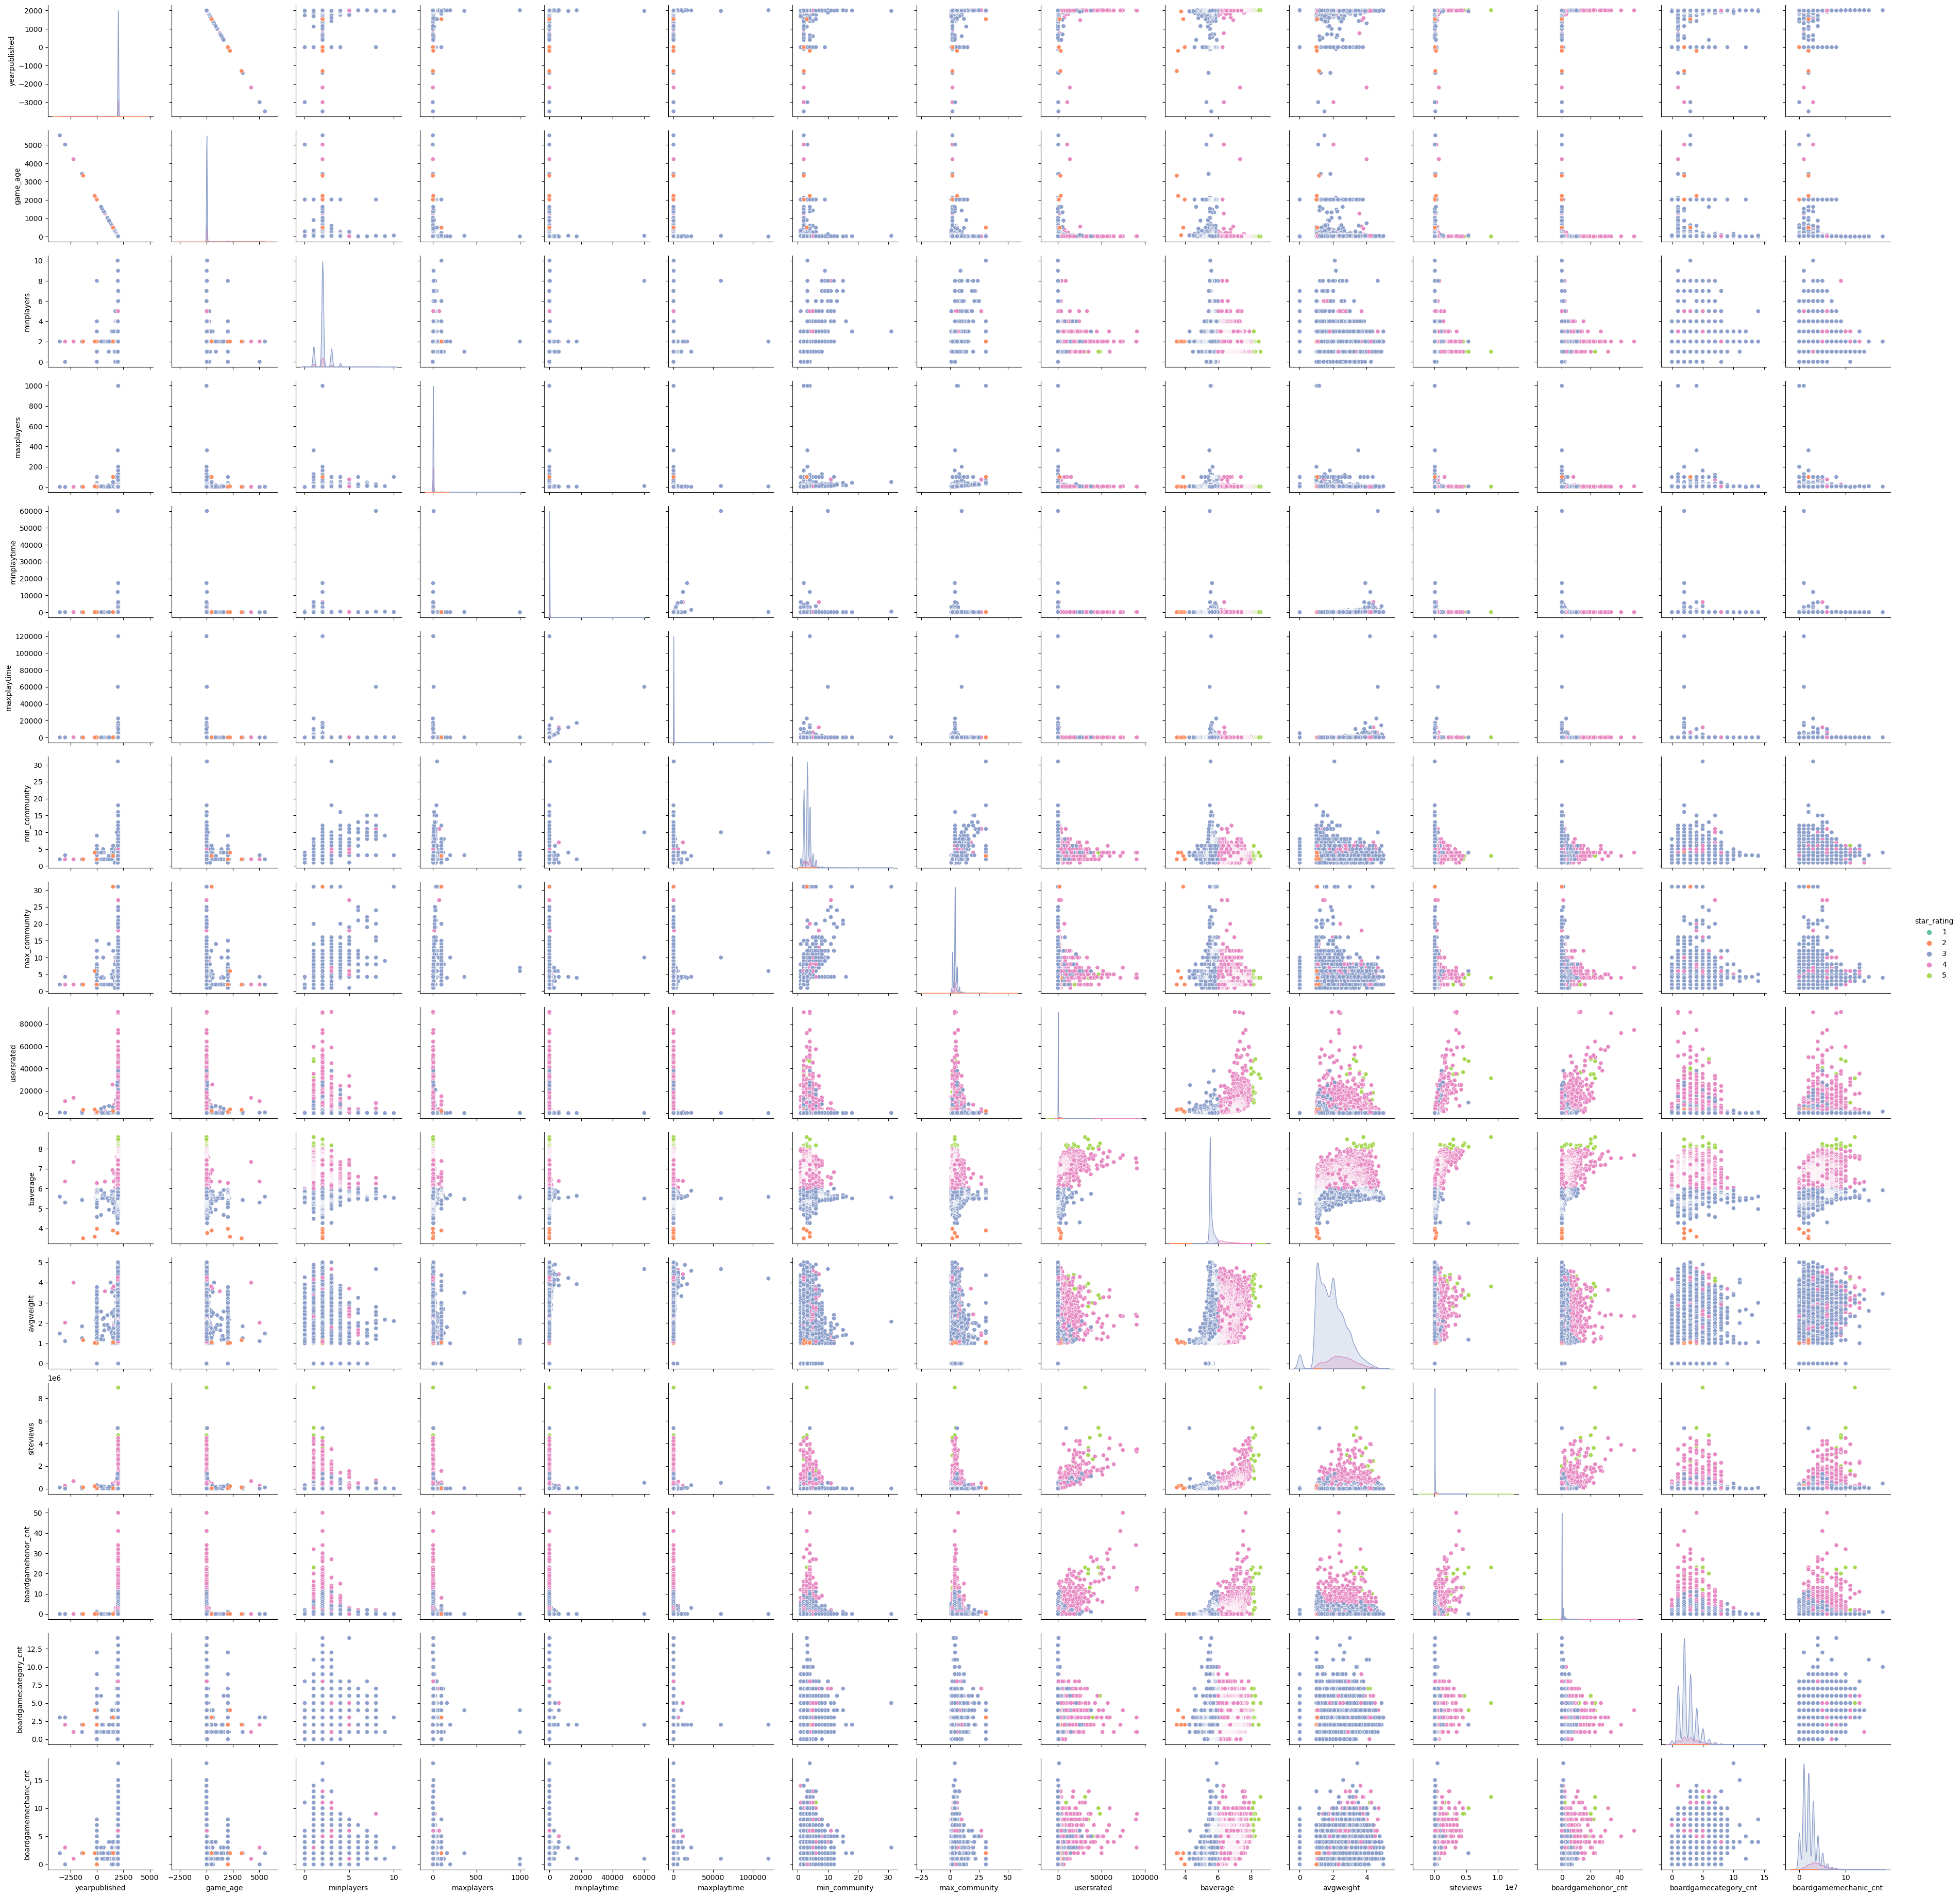

In [17]:
bins = [0, 2, 4, 6, 8, 10]
labels = [1,2,3,4,5]
game_df["star_rating"] = pd.cut(game_df["baverage"], bins=bins, labels=labels)

sns.pairplot(game_df, hue = 'star_rating', palette = 'Set2')

The plots are hard to see at this scale but I have had a closer inspection and found outliers.

I have decided to limit some columns as to remove the influence of these outliers.

In [18]:
# Removing the outliers from the data
game_df = game_df[(game_df['maxplayers']<250)]
game_df = game_df[(game_df['minplaytime']<20000)]
game_df = game_df[(game_df['maxplaytime']<50000)]
game_df = game_df[(game_df['min_community']<20)]
game_df = game_df[(game_df['avgweight']>0)]

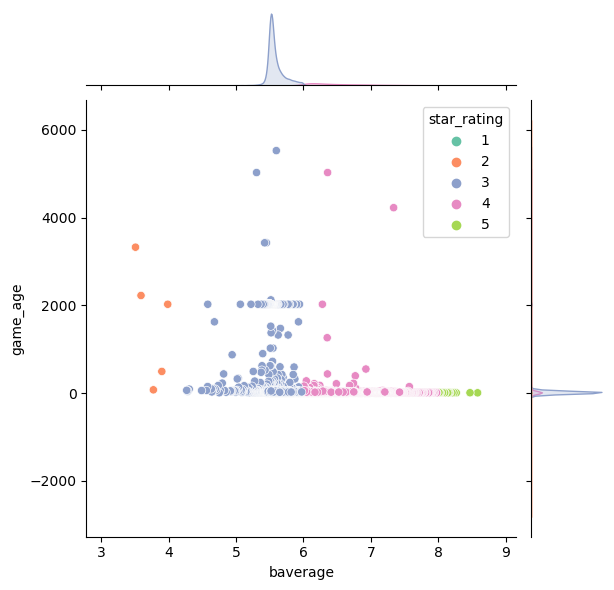

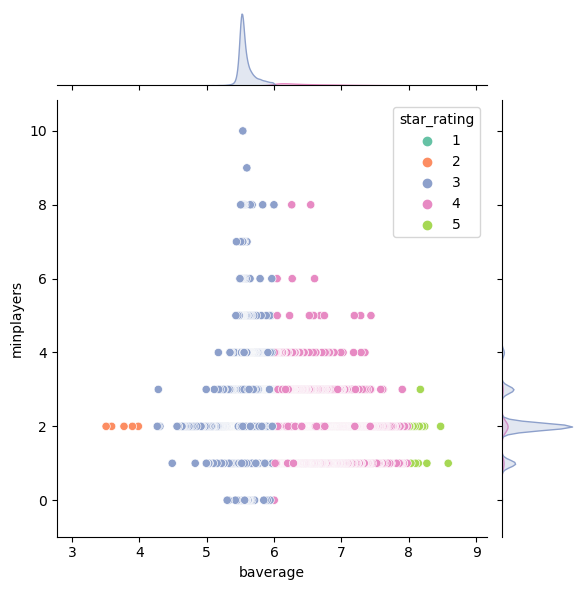

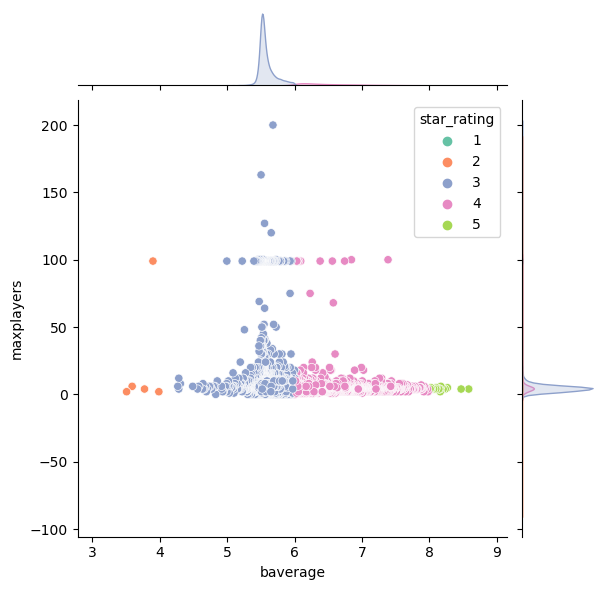

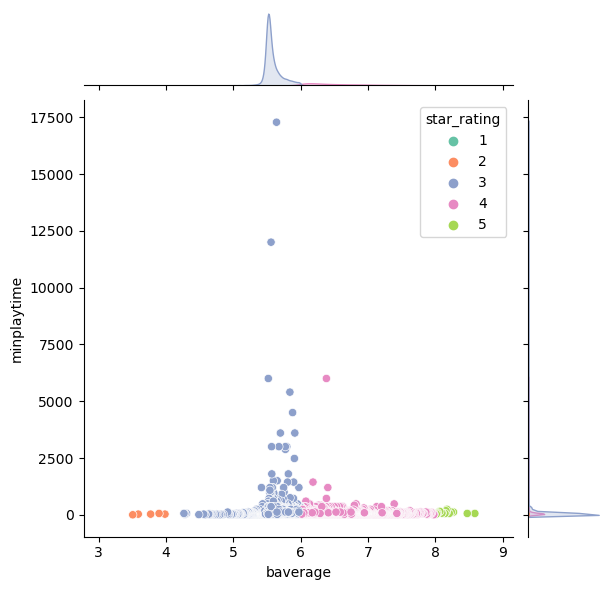

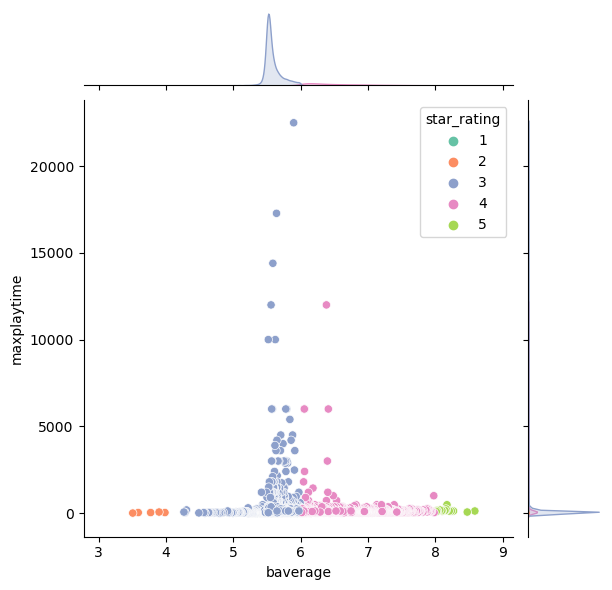

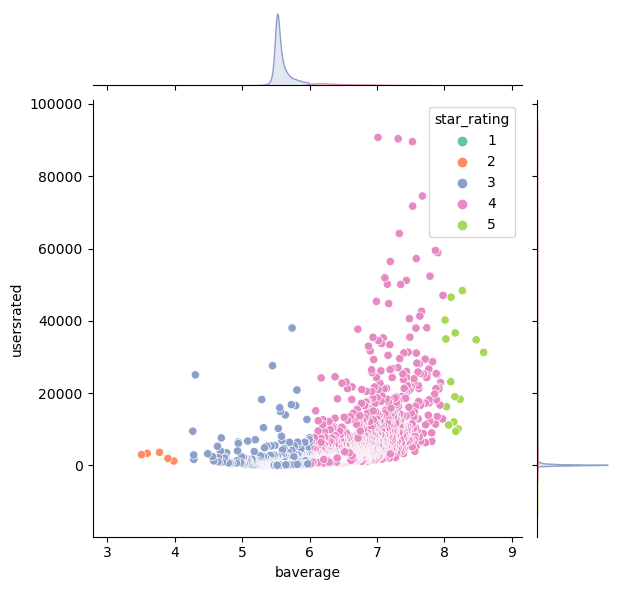

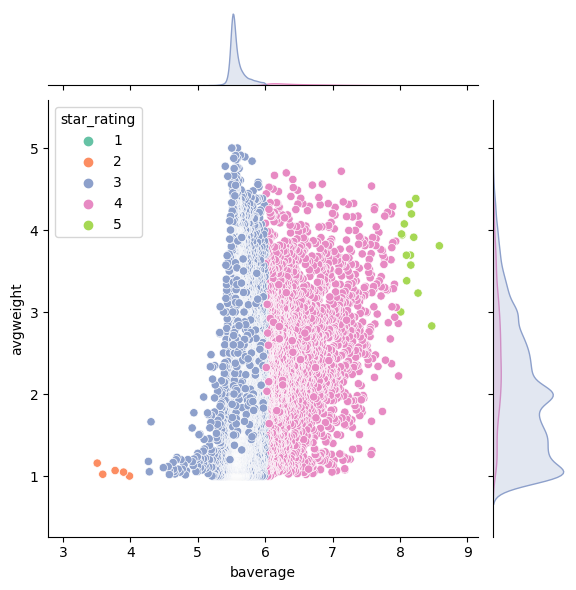

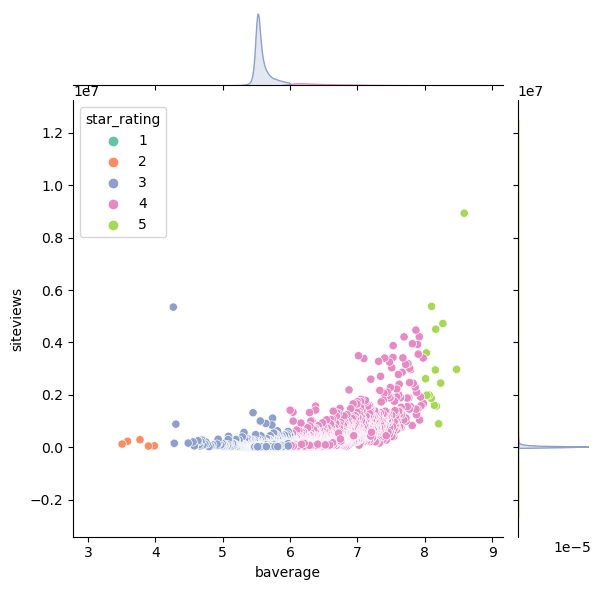

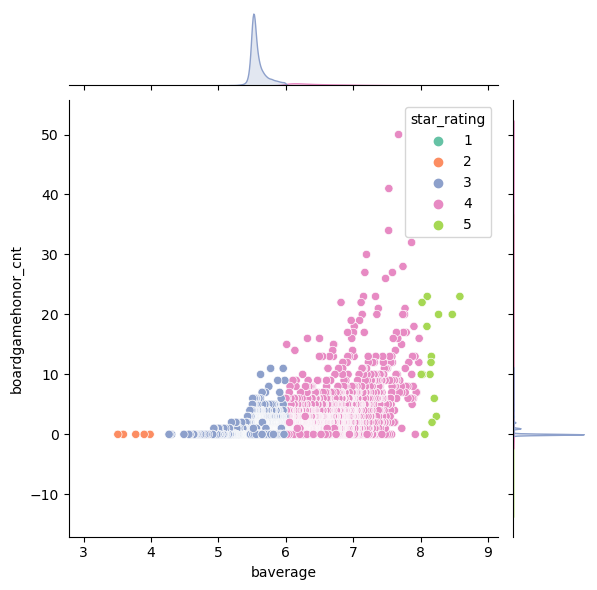

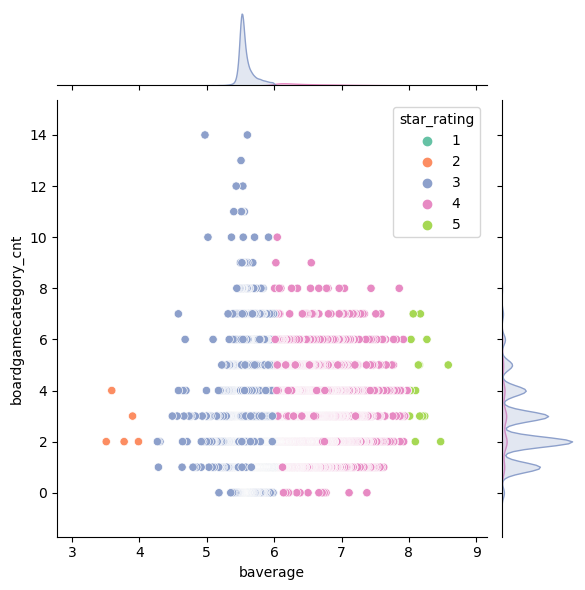

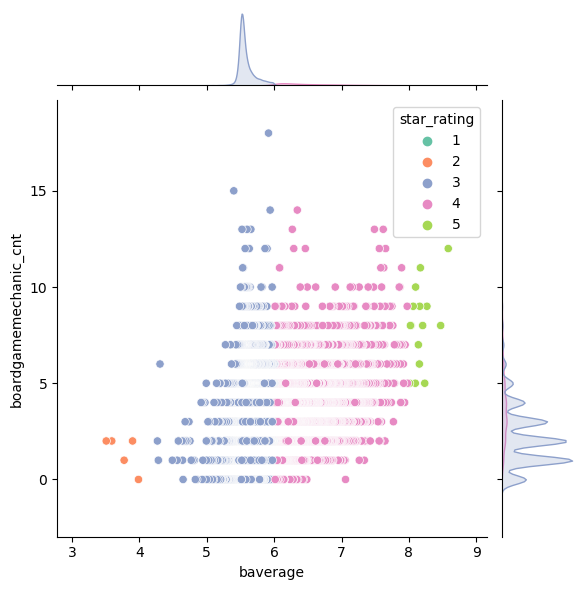

In [19]:
plot_cols = ['game_age', 'minplayers', 'maxplayers', 'minplaytime', 'maxplaytime', 'usersrated', 'avgweight', 'siteviews',
             'boardgamehonor_cnt', 'boardgamecategory_cnt', 'boardgamemechanic_cnt']
for x in plot_cols:
    sns.jointplot(x = game_df['baverage'], y=game_df[x], hue = game_df['star_rating'], palette = 'Set2')
    plt.show

**Some results**

* Game age shows that newer games are scored higher
* Min players of 2-4 recieved the higher score
* Max players also scored higher on less max players
* Games with a higher weight (complexity) scored higher.
* Games with more categories (9+) tend to score lower then games with less (2-7)  

<Axes: >

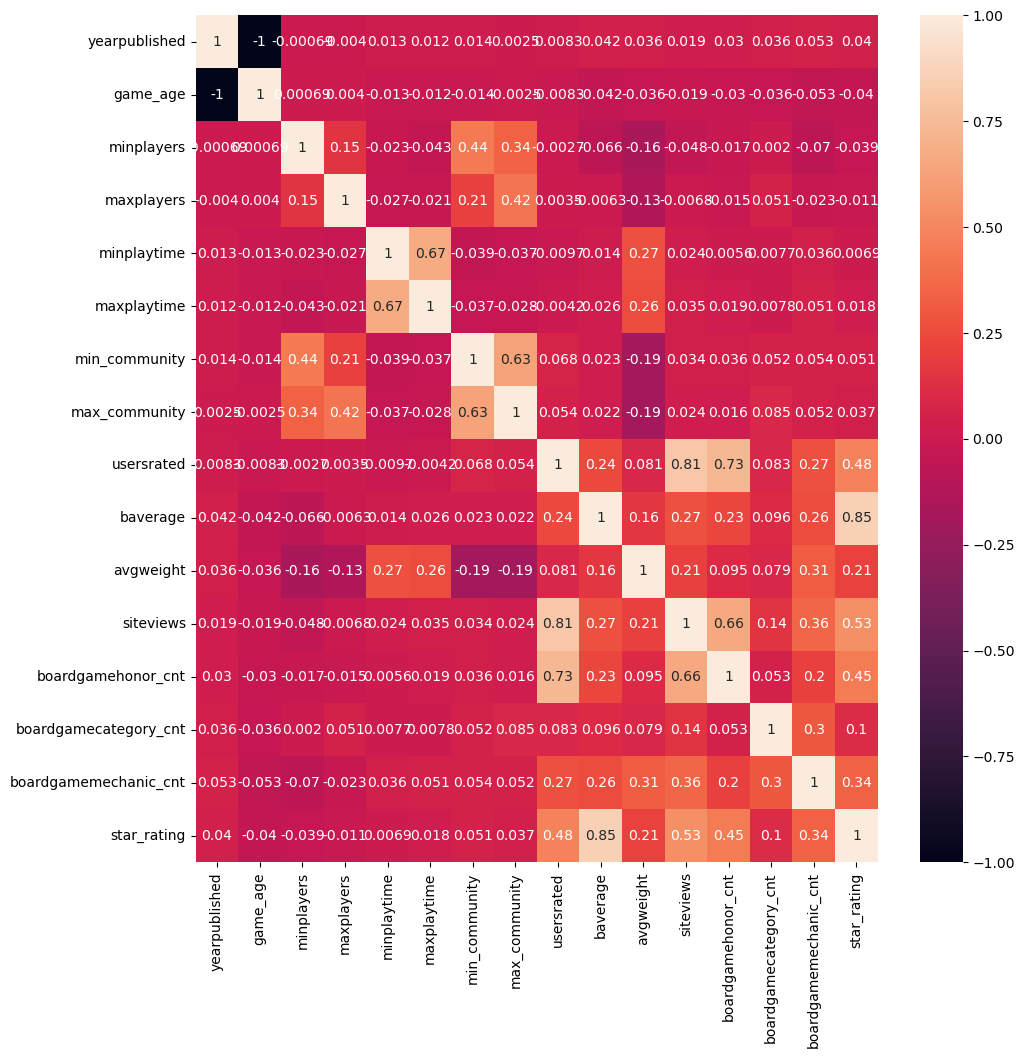

In [20]:
cor_matrix = game_df.corr()
plt.figure(figsize=(11,11))
sns.heatmap(cor_matrix, annot = True)

**Correlation Matrix**

* Can see a strong correlation between users rated and site views aswell as users rated and boardgame honors count (awards)
* Also a correlation between site vies and awards
* there is also a correlation between complexity (avgweight) and baverage (score)

<a id="5"></a>
# <p style="background-color:#42A5F5;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:70px 5px;">DATA PREPERATION/PROCESSING</p>

Here I have assigned the data into test and training sets

In [21]:
X = game_df.drop(['baverage', 'star_rating'],axis = 1)
y = game_df['baverage']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=12)

<a id="6"></a>
# <p style="background-color:#42A5F5;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:70px 5px;">MODEL SELECTION</p>

Here I have:

* Created pipelines for each model with the standard scaler and PCA
* Fitted the models
* Obtained the CV(cross valadation) results

In [22]:
#here i am creating the pipelines for each model
pipe_lr=Pipeline([("scalar1",StandardScaler()),
                      ("pca1",PCA(n_components=10)),
                      ("LR",LinearRegression())])

pipe_dt=Pipeline([("scalar2",StandardScaler()),
                      ("pca2",PCA(n_components=10)),
                      ("DT",DecisionTreeRegressor())])

pipe_rf=Pipeline([("scalar3",StandardScaler()),
                      ("pca3",PCA(n_components=10)),
                      ("RF",RandomForestRegressor())])

pipe_knn=Pipeline([("scalar4",StandardScaler()),
                       ("pca4",PCA(n_components=10)),
                       ("KN",KNeighborsRegressor())])


#this is a list contain the pipelines
pipes = [pipe_lr, pipe_dt, pipe_rf, pipe_knn]

# creating a dictionary with the pipeline names
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors"}


# Fitting pipelines
for i in pipes:
    i.fit(X_train, y_train)

#Getting CV resualts  
cv_results_rms = []
for i, model in enumerate(pipes):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1.141720 
DecisionTree: -1.376645 
RandomForest: -0.985471 
KNeighbors: -1.100185 


**Random Forest Regression was found to be the best model** 

<a id="7"></a>
# <p style="background-color:#42A5F5;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:70px 5px;">MODEL EVALUATION</p>

In [25]:
# Using model on test split
pred = pipe_rf.predict(X_test)

#
r2 = metrics.r2_score(y_test, pred)
Adj_r2 = 1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mse = metrics.mean_squared_error(y_test, pred)
mae = metrics.mean_absolute_error(y_test, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

print('R-Squared (R\u00b2): {:.2f}%'.format(r2 * 100))
print('Adjusted R-Squared: {:.2f}%'.format(Adj_r2 * 100))
print('Mean Squared Error (MSE): {:.2f}'.format(mse))
print('Mean Absolute Error:{:.2f}'.format(mae))
print('Root Mean Square Error:{:.2f}'.format(rmse))

R-Squared (R²): 30.92%
Adjusted R-Squared: 30.66%
Mean Squared Error (MSE): 0.98
Mean Absolute Error:0.43
Root Mean Square Error:0.99


<a id="8"></a>
# <p style="background-color:#42A5F5;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:70px 5px;">CONCLUSION</p>

**This project found the Random Forest Regression model was the best fit with a mean square error of 0.98**